# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib notebook

In [20]:
#Lendo o arquivo
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [21]:
#dCriando um atributo com as categorias do atributo APGAR5
df.loc[(df['APGAR5'] < 4), 'CAT_APGAR5'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'CAT_APGAR5'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'CAT_APGAR5'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'CAT_APGAR5'] = 'normal'

df[['APGAR5','CAT_APGAR5']]

,APGAR5,CAT_APGAR5
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
...,...,...
27023,9.0,normal
27024,9.0,normal
27025,10.0,normal
27026,9.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [32]:
# Distribuição de sexo por categoria de APGAR5
sns.countplot(x='CAT_APGAR5'
              , hue = 'SEXO'
              , data=df
             )

<Axes: xlabel='CAT_APGAR5', ylabel='count'>

<IPython.core.display.Javascript object>


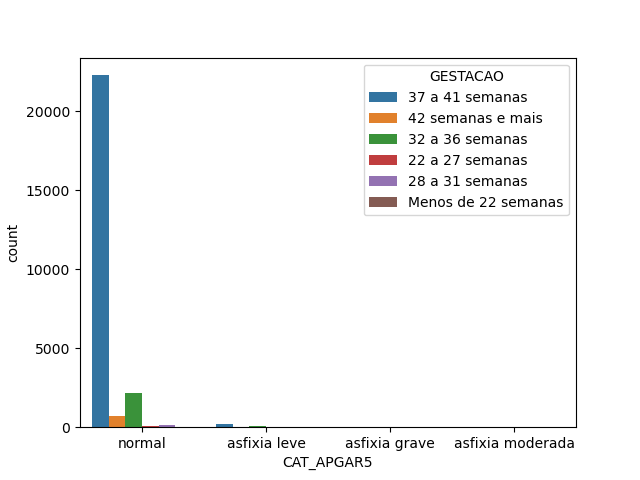

<Axes: xlabel='CAT_APGAR5', ylabel='count'>

In [33]:
# Distribuição de sexo por tempo de GESTAÇÃO
plt.close()
sns.countplot(x='CAT_APGAR5'
              , hue = 'GESTACAO'
              , data=df
             )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [34]:
#Renomeando a variavel gestacao para melhorar a visualizacao do grafico
df.loc[(df['GESTACAO'] == '22 a 27 semanas'), 'GESTACAO_ABRV'] = '22-27'
df.loc[(df['GESTACAO'] == '28 a 31 semanas'), 'GESTACAO_ABRV'] = '28-31'
df.loc[(df['GESTACAO'] == '32 a 36 semanas'), 'GESTACAO_ABRV'] = '32-36'
df.loc[(df['GESTACAO'] == '37 a 41 semanas'), 'GESTACAO_ABRV'] = '37-41'
df.loc[(df['GESTACAO'] == '42 semanas e mais'), 'GESTACAO_ABRV'] = '>=42'
df.loc[(df['GESTACAO'] == 'Menos de 22 semanas'), 'GESTACAO_ABRV'] = '<22'

In [35]:
# Tabela cruzada com as categorias de APGAR5 nas colunas e GESTACAO nas linhas
freq = pd.crosstab(df['GESTACAO_ABRV'], df['CAT_APGAR5'])
freq

CAT_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO_ABRV,,,,
22-27,21,12,1,51
28-31,3,18,12,129
32-36,8,73,19,2134
37-41,33,196,28,22266
<22,2,1,0,4
>=42,1,6,1,690


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [36]:
#Calculando o percentual de cada categoria de APGAR5 para cada tempo de gestação
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

CAT_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO_ABRV,,,,
22-27,0.247059,0.141176,0.011765,0.600000
28-31,0.018519,0.111111,0.074074,0.796296
32-36,0.003581,0.032677,0.008505,0.955237
37-41,0.001465,0.008702,0.001243,0.988589
<22,0.285714,0.142857,0.000000,0.571429
>=42,0.001433,0.008596,0.001433,0.988539


In [37]:
#Verificando se a soma por linha totaliza 1, ou seja, 100%
freq_pctlin.sum(axis = 1)

GESTACAO_ABRV
22-27    1.0
28-31    1.0
32-36    1.0
37-41    1.0
<22      1.0
>=42     1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<IPython.core.display.Javascript object>


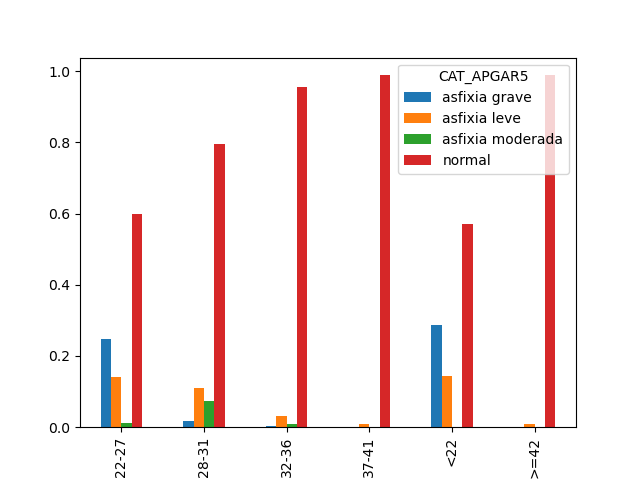

<Axes: xlabel='GESTACAO_ABRV'>

In [38]:
plt.close()
freq_pctlin.plot.bar()

# Análise do gráfico de barras

Considerando o gráfico acima, observamos que a frequência de casos normais decresce quando o número de semanas gestacionais também diminui. Enquanto o número de casos normais diminui o número de casos de asfixia grave aumenta consideravelmente. 

Entretanto, embora os médicos classifiquem como prematuro nascimentos com menos de 37 semanas, podemos observar que nascimentos acima de 32 semanas ainda possuem uma frequência elevada de normalidade nos nascimentos. O número de casos de asfixia aumenta em nascimentos abaixo de 32 semanas.

Assim, considerando apenas a análise dos casos de asfixia, poderíamos considerar como prematuros os nascimentos abaixo de 32 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

                         PESO
CAT_APGAR5                   
asfixia grave     2119.500000
asfixia leve      2809.909375
asfixia moderada  2377.617647
normal            3255.144012


<IPython.core.display.Javascript object>


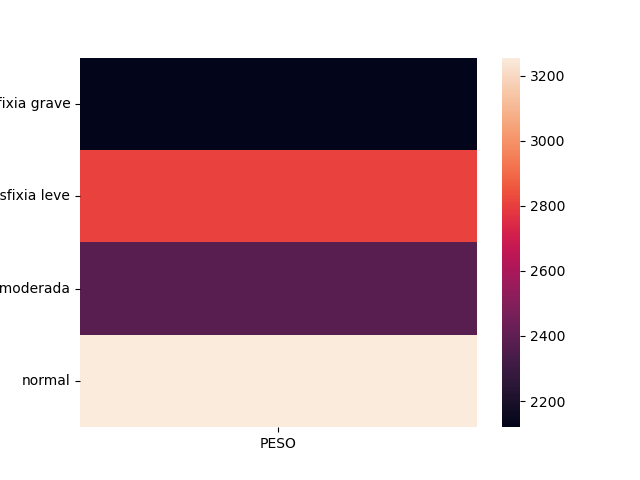

In [75]:
plt.close()
matriz = df[["CAT_APGAR5", "PESO"]].dropna().pivot_table(index='CAT_APGAR5', values='PESO')

print(matriz)

ax = sns.heatmap(matriz)

# Análise da matriz

Com base no gráfico anterior, observamos que quanto maior o peso, menos risco de apresentar um caso de asfixia. Observa-se, por exemplo, que os casos de asfixia grave estão relacionados a pesos mais baixos, enquanto casos normais estão relacionados a pesos mais altos.

Entretanto, neste gráfico, não é possível verificar a variação do peso em relação aos casos de asfixia. Por isso, faremos uma análise descritiva a seguir usando boxplot.

In [72]:
#Analisando os valores de PESO considerando o APGAR categorizado
print(df[['CAT_APGAR5','PESO']].groupby('CAT_APGAR5').describe())

                     PESO                                                    \
                    count         mean          std    min      25%     50%   
CAT_APGAR5                                                                    
asfixia grave        74.0  2119.500000  1344.619417  320.0   701.00  2285.0   
asfixia leve        320.0  2809.909375   922.801076  425.0  2333.75  3082.5   
asfixia moderada     68.0  2377.617647  1064.169104  655.0  1283.75  2617.5   
normal            26463.0  3255.144012   524.068542  258.0  2970.00  3275.0   

                                   
                      75%     max  
CAT_APGAR5                         
asfixia grave     3273.00  5060.0  
asfixia leve      3472.50  4505.0  
asfixia moderada  3318.75  4075.0  
normal            3580.00  5985.0  


<IPython.core.display.Javascript object>


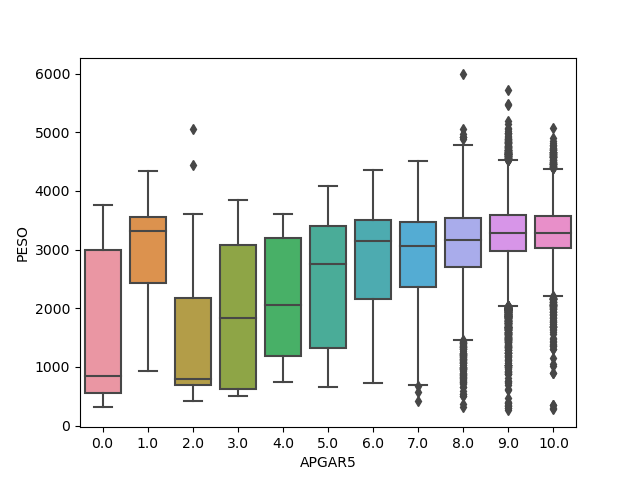

In [39]:
# Análise descritiva de APGAR5 e PESO utilizando Boxplot
plt.close()
ax = sns.boxplot(x="APGAR5", y="PESO", data=df)

<IPython.core.display.Javascript object>


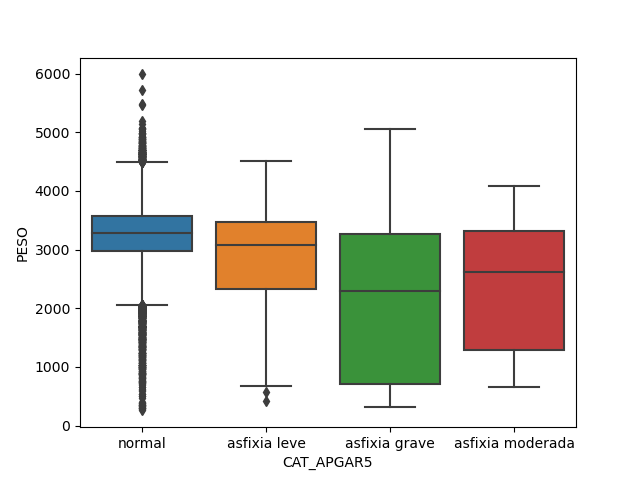

In [73]:
# Análise descritiva de CAT_APGAR5 e PESO utilizando Boxplot
plt.close()
ax = sns.boxplot(x="CAT_APGAR5", y="PESO", data=df)

# Análise dos Boxplot

Considerando os boxplots anteriores, principalmente o anterior que reflete a distribuição do PESO pelo APGAR5 categorizado, observamos que, de fato, há uma tendência de que quanto maior o peso, menor as chances do recém nascido apresentar casos de asfixia graves.

Os casos normais estão concentrados nos pesos acima de 3kg, ou seja, 75% dos casos normais possuem mais de 3kg, sendo recém nascidos abaixo de 2kg que apresentam normalidade na respiração são valores pouco prováveis.

A caixa de asfixia leve é um pouco maior, indicando que há uma maior dispersão dos casos quando consideramos o peso. Os casos de asfixia moderada e grave apresentam caixas ainda maiores com uma média de peso mais baixa.

Assim, podemos concluir que recém nascidos com pesos mais elevados apresentam um quadro de normalidade na maioria dos casos. Porém, não há garantias de que o peso elevado representará um caso de normalidade, visto que, ao analisarmos os casos de asfixia, observamos que há casos graves mesmo quando o recém nascido apresenta um peso elevado. Portanto, há necessidade de analisar outras variáveis para uma melhor representação dos casos de asfixia.